In [57]:
# Import statements
# from scipy.interpolate import griddata
# import plotly.graph_objects as go
# from sklearn.preprocessing import MinMaxScaler
# import plotly.express as px
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.linear_model import LinearRegression, RidgeCV
# from sklearn.model_selection import cross_val_score, KFold
# import shap
# import statsmodels.api as sm
# from mpl_toolkits.mplot3d import Axes3D
# import os
# import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# import scipy.stats as st
# import plotly.express as px
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import RidgeCV
# from sklearn.ensemble import RandomForestRegressor

In [58]:
# Read in file
filename = 'sweetspot_UT_Austin.csv'
df = pd.read_csv(filename)

In [59]:
# Size and top 8 rows in dataset
print('Data size:', df.shape)
df.head(n=8)

Data size: (55, 14)


Well Number Well Name  Bottomhole X  Bottomhole Y  Co [MSTB]      Cw (bbl)  \
0            1     PO1_1       5064.04      13746.23  55.191600  1.617450e-04   
1            2     PO1_2       7668.40      13746.23  27.529400  1.394790e-04   
2            3     PO1_3       2459.67      13746.23  48.354000  1.973990e-04   
3            4     PO1_4      10272.76      13746.23   0.572057  1.440000e-07   
4            5     PO1_5      12877.11      13746.23   0.430394  8.560000e-08   
5            6     PO1_6      10272.76      11141.88   0.995444  3.840000e-07   
6            7     PO1_7      11430.25      11141.88   0.215019  6.030030e-01   
7            8     PO1_8      12877.11      11141.88   0.000000  1.244600e+00   

      POROS        KX        KY  TD(MD)   Cg (mmcf)  FACIES   P_2020-1-6  \
0  0.128029  0.020377  0.020377  8551.7  157.119447       3  3491.971374   
1  0.101876  0.015088  0.015088  8579.9   69.831076       4  3501.327981   
2  0.119220  0.022396  0.022396  8557.1  134.781940       4  3493.763065   
3  0.064132  0.000091  0.000091  8635.5    1.101210       5  3519.775759   
4  0.063078  0.000067  0.000067  8718.6    0.435085       5  3547.347889   
5  0.071007  0.000168  0.000168  8555.5    2.792220       5  3493.232193   
6  0.069382  0.000162  0.000162  8589.1    0.523657       5  3504.380491   
7  0.074247  0.000270  0.000270  8638.6    0.000000       5  3520.804323   

    P_2029-1-1  
0  2992.403113  
1  2947.374808  
2  2904.053641  
3  3301.826052  
4  3365.597401  
5  3196.746890  
6  3126.405930  
7  2949.434450

In [60]:
# Print out the amount of missing values
print((df == 0).sum())
df[(df == 0).any(axis=1)]

Well Number     0
Well Name       0
Bottomhole X    0
Bottomhole Y    0
Co [MSTB]       5
Cw (bbl)        0
POROS           0
KX              0
KY              0
TD(MD)          0
Cg (mmcf)       5
FACIES          0
P_2020-1-6      0
P_2029-1-1      0
dtype: int64


Well Number Well Name  Bottomhole X  Bottomhole Y  Co [MSTB]  Cw (bbl)  \
7             8     PO1_8      12877.11      11141.88        0.0   1.24460   
8             9     PO1_9      14034.61      11141.88        0.0   1.30679   
26           27    PO1_27      14034.61       8537.52        0.0  30.15660   
27           28    PO1_28      14034.61       5933.16        0.0  37.77570   
46           47    PO1_47      14034.61       3328.80        0.0  87.57740   

       POROS        KX        KY  TD(MD)  Cg (mmcf)  FACIES   P_2020-1-6  \
7   0.074247  0.000270  0.000270  8638.6        0.0       5  3520.804323   
8   0.073380  0.000284  0.000284  8684.3        0.0       5  3535.967335   
26  0.116111  0.033130  0.010039  8645.4        0.0       4  3523.060526   
27  0.112872  0.012573  0.012573  8647.7        0.0       4  3523.823653   
46  0.143755  0.038000  0.038000  8691.2        0.0       3  3538.256717   

     P_2029-1-1  
7   2949.434450  
8   2954.485548  
26  2676.168143  
27  2694.598799  
46  2515.127738

In [61]:
# Well number and name are redundant (can use row index) and can be removed.
df.drop(columns=['Well Number', 'Well Name'], inplace=True)
df.head()

Bottomhole X  Bottomhole Y  Co [MSTB]      Cw (bbl)     POROS        KX  \
0       5064.04      13746.23  55.191600  1.617450e-04  0.128029  0.020377   
1       7668.40      13746.23  27.529400  1.394790e-04  0.101876  0.015088   
2       2459.67      13746.23  48.354000  1.973990e-04  0.119220  0.022396   
3      10272.76      13746.23   0.572057  1.440000e-07  0.064132  0.000091   
4      12877.11      13746.23   0.430394  8.560000e-08  0.063078  0.000067   

         KY  TD(MD)   Cg (mmcf)  FACIES   P_2020-1-6   P_2029-1-1  
0  0.020377  8551.7  157.119447       3  3491.971374  2992.403113  
1  0.015088  8579.9   69.831076       4  3501.327981  2947.374808  
2  0.022396  8557.1  134.781940       4  3493.763065  2904.053641  
3  0.000091  8635.5    1.101210       5  3519.775759  3301.826052  
4  0.000067  8718.6    0.435085       5  3547.347889  3365.597401

In [62]:
# Rename column headers to be more human-readable
mappings = {
    'Bottomhole X': 'bh_x',         # Bottomhole X-coordinate
    'Bottomhole Y': 'bh_y',         # Bottomhole Y-coordinate
    'Co [MSTB]':'oil_prod_mstb',    # Cumulative oil production, thousand stock tank barrels
    'Cw (bbl)':'water_prod_bbl',    # Cumulative water production, barrels
    'POROS':'porosity',             # Porosity
    'KX':'perm_x',                  # X permeability
    'KY':'perm_y',                  # Y permeability
    'TD(MD)':'total_depth_md',      # Total depth (measured depth)
    'Cg (mmcf)':'gas_prod_mmcf',    # Gas production, million cubic feet
    'FACIES':'facies',              # Facies
    'P_2020-1-6':'past_pressure',   # Pressure on January 6, 2020
    'P_2029-1-1':'future_pressure'  # Predicted pressure on January 1, 2029
}

df.rename(columns=mappings, inplace=True)

In [63]:
# One-hot encode facies since it is categorical
df = pd.get_dummies(df, columns=['facies'], drop_first=True)

# Rearrange columns: well coordinates, production amounts, rock info, and dates
df = df[['bh_x', 'bh_y', 'total_depth_md', 'oil_prod_mstb', 'water_prod_bbl', 'gas_prod_mmcf', 'perm_x', 'perm_y', 'porosity', 'facies_2', 'facies_3', 'facies_4', 'facies_5', 'past_pressure', 'future_pressure']]
df.head()

bh_x      bh_y  total_depth_md  oil_prod_mstb  water_prod_bbl  \
0   5064.04  13746.23          8551.7      55.191600    1.617450e-04   
1   7668.40  13746.23          8579.9      27.529400    1.394790e-04   
2   2459.67  13746.23          8557.1      48.354000    1.973990e-04   
3  10272.76  13746.23          8635.5       0.572057    1.440000e-07   
4  12877.11  13746.23          8718.6       0.430394    8.560000e-08   

   gas_prod_mmcf    perm_x    perm_y  porosity  facies_2  facies_3  facies_4  \
0     157.119447  0.020377  0.020377  0.128029     False      True     False   
1      69.831076  0.015088  0.015088  0.101876     False     False      True   
2     134.781940  0.022396  0.022396  0.119220     False     False      True   
3       1.101210  0.000091  0.000091  0.064132     False     False     False   
4       0.435085  0.000067  0.000067  0.063078     False     False     False   

   facies_5  past_pressure  future_pressure  
0     False    3491.971374      2992.403113  
1     False    3501.327981      2947.374808  
2     False    3493.763065      2904.053641  
3      True    3519.775759      3301.826052  
4      True    3547.347889      3365.597401

In [64]:
missing = df[(df == 0).any(axis=1)]
missing

bh_x      bh_y  total_depth_md  oil_prod_mstb  water_prod_bbl  \
0    5064.04  13746.23          8551.7      55.191600    1.617450e-04   
1    7668.40  13746.23          8579.9      27.529400    1.394790e-04   
2    2459.67  13746.23          8557.1      48.354000    1.973990e-04   
3   10272.76  13746.23          8635.5       0.572057    1.440000e-07   
4   12877.11  13746.23          8718.6       0.430394    8.560000e-08   
5   10272.76  11141.88          8555.5       0.995444    3.840000e-07   
6   11430.25  11141.88          8589.1       0.215019    6.030030e-01   
7   12877.11  11141.88          8638.6       0.000000    1.244600e+00   
8   14034.61  11141.88          8684.3       0.000000    1.306790e+00   
9    8825.89  11141.88          8521.2      83.436700    1.136740e-04   
10   6221.53  11141.88          8480.9     104.887500    3.392270e-04   
11   5064.04  11141.88          8471.7     113.904000    4.363870e-04   
12   3617.17  11141.88          8467.9     120.743000    4.921050e-04   
13   2459.67  11141.88          8477.1     113.851000    4.593210e-04   
14   7668.40  11141.88          8499.9     102.964900    3.251530e-04   
15   1012.81  11141.88          8511.4      97.468000    2.997180e-04   
16   5064.04   8537.52          8432.9      43.322600    1.436490e-04   
17   2459.67   8537.52          8438.2      37.530800    9.460000e-05   
18   3617.17   8537.52          8429.1      43.692100    1.222690e-04   
19   7668.40   8537.52          8461.0      41.887180    6.750000e-05   
20   6221.53   8537.52          8442.0      32.858100    1.173760e-04   
21   1012.81   8537.52          8472.5     112.653480    6.760000e-05   
22   8825.89   8537.52          8482.4     114.578560    6.530000e-05   
23  11430.25   8537.52          8550.2      44.815680    8.807090e-02   
24  10272.76   8537.52          8516.7      93.843100    3.693690e-01   
25  12877.11   8537.52          8599.7      30.609516    1.037960e+01   
26  14034.61   8537.52          8645.4       0.000000    3.015660e+01   
27  14034.61   5933.16          8647.7       0.000000    3.777570e+01   
28  10272.76   5933.16          8519.0      87.850100    1.939310e-04   
29   3617.17   5933.16          8431.3      46.012000    4.755230e-04   
30   5064.04   5933.16          8435.1      49.817000    5.106820e-04   
31   6221.53   5933.16          8444.3      45.574000    4.010130e-04   
32   2459.67   5933.16          8440.5      47.893000    4.423580e-04   
33   7668.40   5933.16          8463.3     105.478500    3.036800e-04   
34   8825.89   5933.16          8484.7     108.670800    2.558970e-04   
35   1012.81   5933.16          8474.8     116.339000    3.388190e-04   
36  11430.25   5933.16          8552.5      32.658400    1.130300e-04   
37  12877.11   5933.16          8602.0      11.742000    3.060000e-05   
38   1012.81   3328.80          8518.2      92.791900    7.830000e-05   
39  10272.76   3328.80          8562.4      12.126100    2.810000e-05   
40  11430.25   3328.80          8595.9       9.919290    1.710000e-05   
41   8825.89   3328.80          8528.1      79.678800    3.180000e-05   
42   7668.40   3328.80          8506.8     100.765000    1.548230e-04   
43   2459.67   3328.80          8483.9     103.745600    8.666390e-04   
44   6221.53   3328.80          8487.7     107.186100    2.198220e+01   
45  12877.11   3328.80          8645.4       0.046446    9.260200e+01   
46  14034.61   3328.80          8691.2       0.000000    8.757740e+01   
47   3617.17   3328.80          8474.8     105.355000    3.373470e-04   
48   5064.04   3328.80          8478.6     112.441600    3.659090e-04   
49   3617.17    724.43          8559.4      70.304000    4.936590e-04   
50   6221.53    724.43          8572.3      70.127000    3.809430e-04   
51   1012.81    724.43          8602.8      79.699500    2.834320e-04   
52   8825.89    724.43          8612.7      37.603100    1.328980e-04   
53  11430.25    724.43          8680.5      30.984200    1.046360e

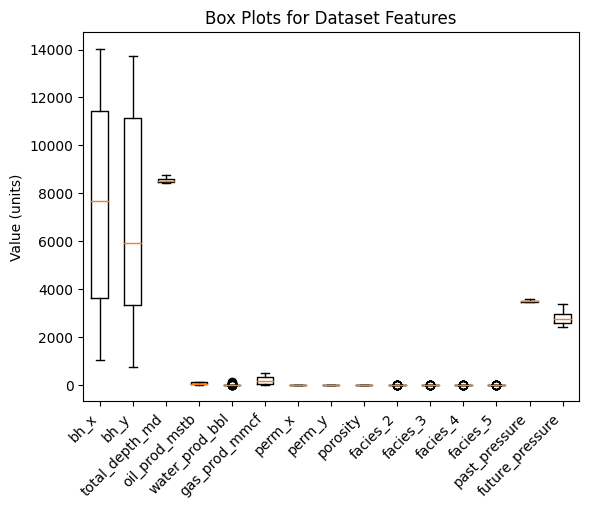

In [65]:
# Boxplots to check for outliers
plt.boxplot(df, labels=df.columns)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value (units)')
plt.title('Box Plots for Dataset Features')
plt.show()

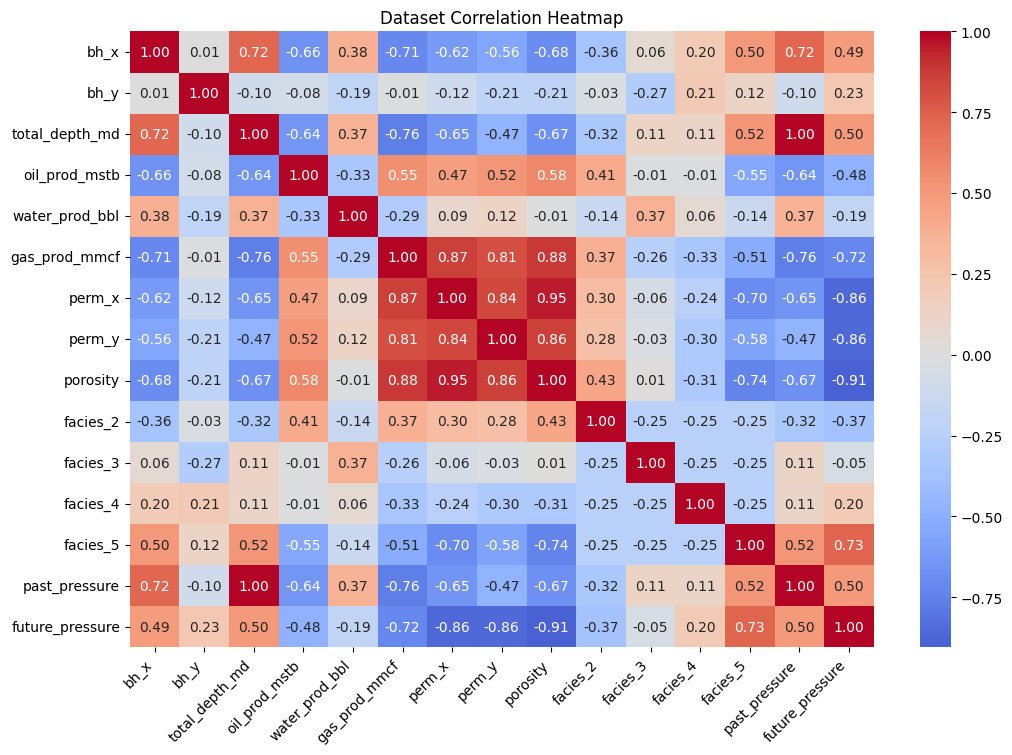

In [66]:
# Heatmap to display correlations
correlation_matrix = df.corr()
# correlation_matrix = correlation_matrix[['oil_prod_mstb']]
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Dataset Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()